No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


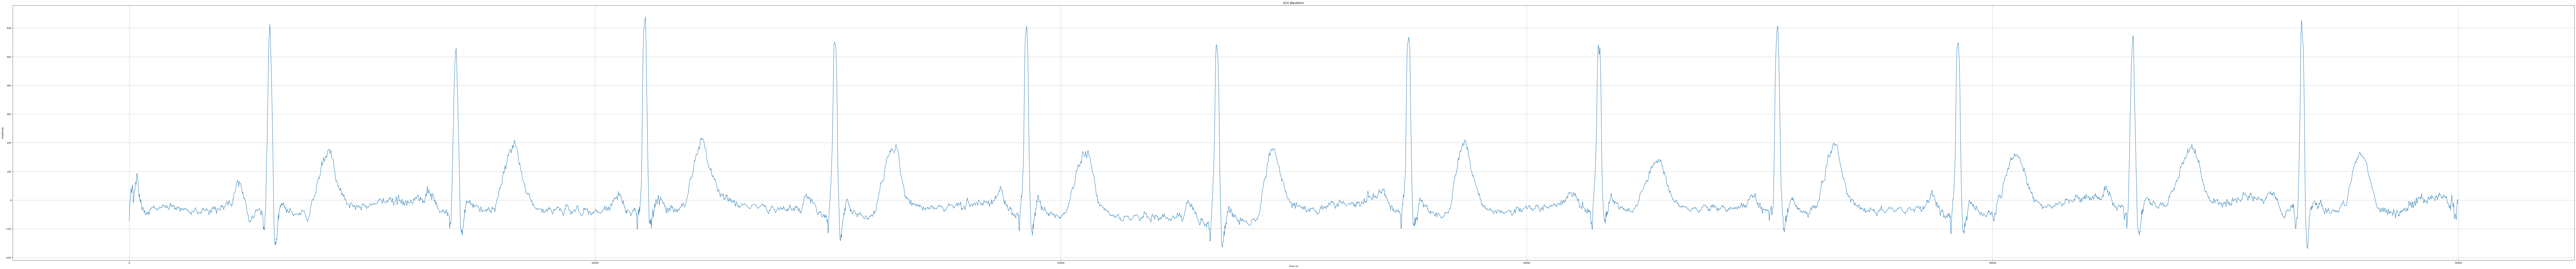

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .asc file
file_path = "./124.asc"  # Replace with the actual path to your file
ecg_data = np.loadtxt(file_path)


# Extract the first column
first_column = ecg_data[:, 0]

# Generate time values for the x-axis
time_values = np.arange(0, len(first_column) * 10, 10)

# Plot the ECG wave for the first lead
plt.plot(time_values, first_column)



# Customize the plot
plt.title('ECG Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Adjust figure size and DPI to avoid the ValueError
fig = plt.gcf()
fig.set_size_inches(200, 20)  # Adjust the size as needed
fig.set_dpi(100)  # Adjust the DPI as needed

# Show the plot
plt.show()


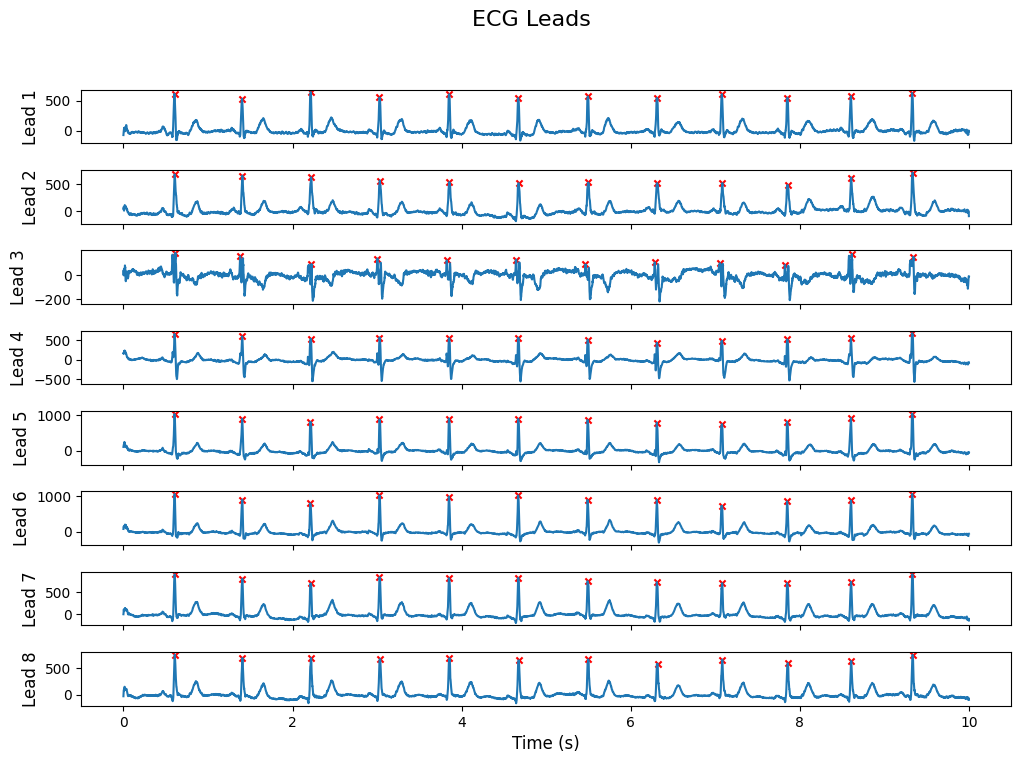

In [153]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_ecg_leads(ecg_data, sampling_rate):
    num_leads = ecg_data.shape[1]
    time = np.arange(ecg_data.shape[0]) / sampling_rate

    fig, axs = plt.subplots(num_leads, 1, figsize=(12, 8), sharex=True)
    fig.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots

    for i, ax in enumerate(axs):
        ecg_lead = ecg_data[:, i]
        ax.plot(time, ecg_lead)
        ax.set_ylabel(f'Lead {i+1}', fontsize=12)
        ax.tick_params(axis='both', labelsize=10)

        # Optional: Plot R-peaks
        peaks, _ = find_peaks(ecg_lead, distance=350)
        peak_times = peaks / sampling_rate
        ax.scatter(peak_times, ecg_lead[peaks], color='r', marker='x', label='R-peaks', s=20)

    axs[-1].set_xlabel('Time (s)', fontsize=12)
    fig.suptitle('ECG Leads', fontsize=16)
    plt.show()

# Example usage
sampling_rate = 500  # Assuming a sampling rate of 500 Hz
plot_ecg_leads(ecg_data, sampling_rate)

In [27]:
import numpy as np

# Load the data from the .asc file
file_path = "./124.asc"  # Replace with the actual path to your file
ecg_data = np.loadtxt(file_path)


# Loop through each row and column
for row in ecg_data:
    for element in row:
        print(f"{element:.2f}", end="\t")  # Format each element to 2 decimal places
    print()  # Move to the next row

-73.00	48.00	3.00	158.00	108.00	75.00	-1.00	-30.00	
-29.00	77.00	37.00	152.00	142.00	137.00	32.00	25.00	
-5.00	75.00	16.00	187.00	163.00	143.00	106.00	85.00	
17.00	15.00	-5.00	163.00	182.00	127.00	93.00	83.00	
42.00	13.00	36.00	216.00	179.00	144.00	74.00	106.00	
25.00	83.00	25.00	221.00	155.00	120.00	100.00	75.00	
37.00	75.00	51.00	219.00	249.00	148.00	71.00	97.00	
53.00	61.00	54.00	236.00	222.00	157.00	103.00	147.00	
37.00	115.00	30.00	201.00	183.00	164.00	123.00	95.00	
-10.00	69.00	76.00	207.00	145.00	198.00	135.00	113.00	
2.00	63.00	58.00	222.00	113.00	180.00	126.00	116.00	
31.00	65.00	62.00	213.00	156.00	160.00	133.00	114.00	
34.00	61.00	-13.00	180.00	148.00	171.00	103.00	114.00	
51.00	68.00	-29.00	166.00	122.00	189.00	92.00	102.00	
64.00	94.00	-52.00	164.00	118.00	171.00	99.00	90.00	
54.00	65.00	-35.00	147.00	98.00	175.00	94.00	93.00	
92.00	63.00	-1.00	158.00	133.00	124.00	117.00	101.00	
93.00	49.00	-13.00	138.00	124.00	89.00	105.00	101.00	
74.00	41.00	14.00	122.00	140.00	125.00	1

In [28]:
sampling_rate = 500

### R-peak detection and R-R interval extraction:

In [64]:
import numpy as np
from scipy.signal import find_peaks

def extract_rr_intervals(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)  # Adjust the distance parameter as needed
    
    # Calculate R-R intervals
    rr_intervals = np.diff(peaks) / sampling_rate  # Assuming sampling_rate is known
    
    return rr_intervals

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
rr_intervals = extract_rr_intervals(ecg_lead)

In [65]:
len(rr_intervals)

11

In [66]:
rr_intervals

array([0.8  , 0.812, 0.812, 0.824, 0.816, 0.826, 0.814, 0.77 , 0.774,
       0.752, 0.722])

### QRS complex analysis:

In [84]:
import numpy as np
from scipy.signal import find_peaks

def extract_qrs_features(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=300)  # Adjust the distance parameter as needed
    
    # Extract QRS complex features
    qrs_durations = []
    qrs_amplitudes = []
    for peak_idx in peaks:
        # Define a window around the R-peak
        window_start = max(0, peak_idx - 15)  # Adjust window size as needed
        window_end = min(len(ecg_lead), peak_idx + 15)
        qrs_segment = ecg_lead[window_start:window_end]
        
        # Calculate QRS duration
        qrs_duration = len(qrs_segment) / sampling_rate
        qrs_durations.append(qrs_duration)
        
        # Calculate QRS amplitude
        qrs_amplitude = np.max(qrs_segment) - np.min(qrs_segment)
        qrs_amplitudes.append(qrs_amplitude)
    
    return qrs_durations, qrs_amplitudes

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

In [75]:
qrs_durations

[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.262]

In [76]:
qrs_amplitudes

[770.0,
 653.0,
 741.0,
 692.0,
 729.0,
 706.0,
 668.0,
 643.0,
 717.0,
 667.0,
 695.0,
 795.0,
 94.0]

In [35]:
len(qrs_amplitudes)

13

### Plot

IndexError: index 12 is out of bounds for axis 0 with size 12

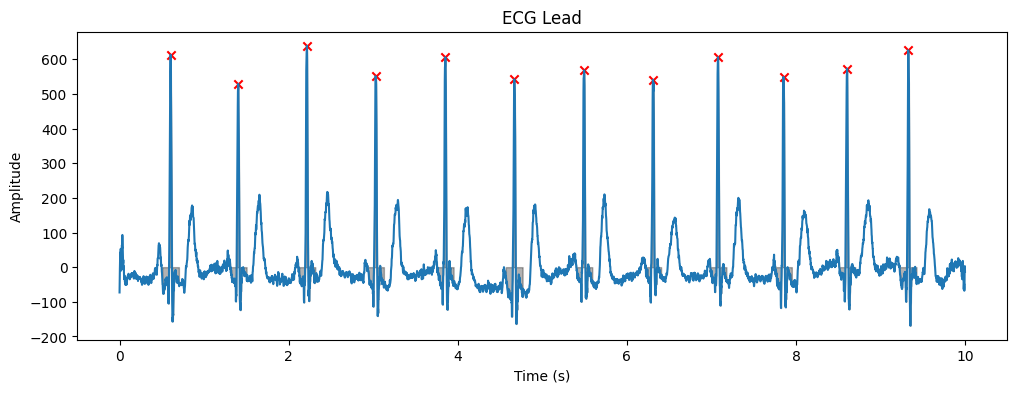

In [55]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals=None, qrs_durations=None, qrs_amplitudes=None):
    # Calculate time axis
    time = np.arange(len(ecg_lead)) / sampling_rate
    
    # Plot ECG lead
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(time, ecg_lead)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title('ECG Lead')
    
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)
    
    # Plot R-peaks
    peak_times = peaks / sampling_rate
    ax.scatter(peak_times, ecg_lead[peaks], color='r', marker='x', label='R-peaks')
    
    # Plot QRS complexes
    if qrs_durations and qrs_amplitudes:
        for peak_idx, (duration, amplitude) in enumerate(zip(qrs_durations, qrs_amplitudes)):
            peak_time = peak_times[peak_idx]
            qrs_start = peak_time - duration / 2
            qrs_end = peak_time + duration / 2
            qrs_segment = ecg_lead[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)]
            ax.fill_between(time[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)], qrs_segment, alpha=0.3,color='black', label='QRS complex' if peak_idx == 0 else None)
    
    # Plot R-R intervals
    if rr_intervals is not None:
        rr_times = np.cumsum(rr_intervals)
        ax.vlines(rr_times, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals')
    
    # ax.legend()
    plt.show()

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract features
rr_intervals = extract_rr_intervals(ecg_lead)
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

# Plot the ECG lead with R-peaks, QRS complexes, and R-R intervals
plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals, qrs_durations, qrs_amplitudes)

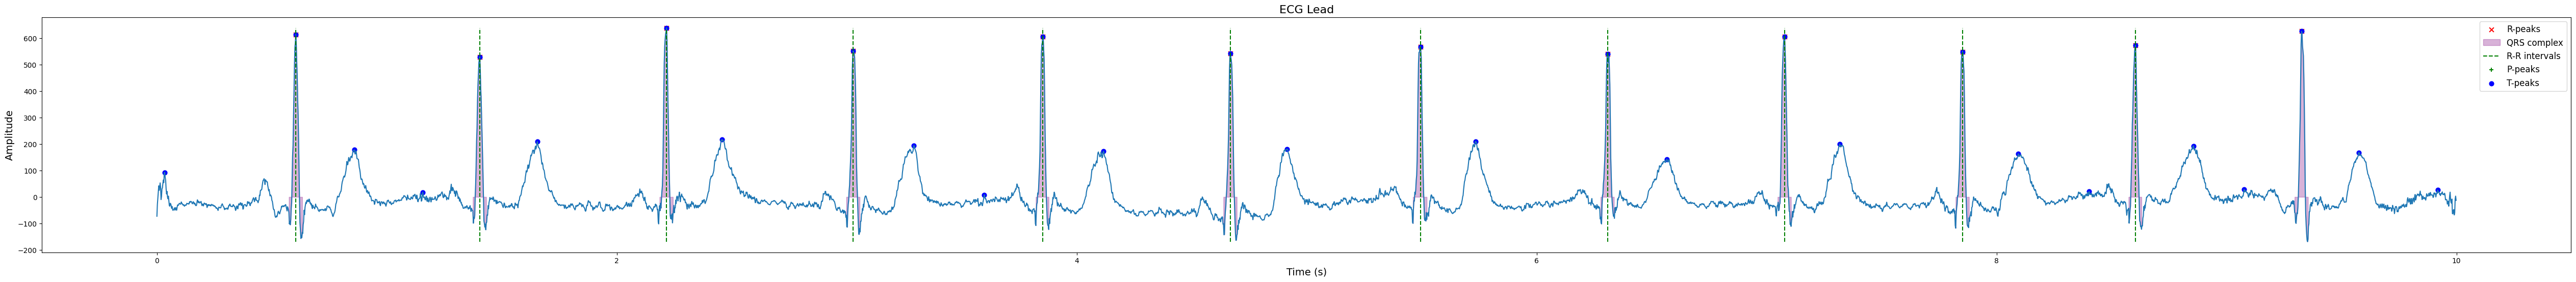

In [98]:
def plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals=None, qrs_durations=None, qrs_amplitudes=None):
    # Calculate time axis
    time = np.arange(len(ecg_lead)) / sampling_rate
    
    # Plot ECG lead
    fig, ax = plt.subplots(figsize=(64, 6))  # Increased plot size
    ax.plot(time, ecg_lead)
    ax.set_xlabel('Time (s)', fontsize=14)  # Increased font size for x-axis label
    ax.set_ylabel('Amplitude', fontsize=14)  # Increased font size for y-axis label
    ax.set_title('ECG Lead', fontsize=16)  # Increased font size for title
    
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)
    
    # Plot R-peaks
    peak_times = peaks / sampling_rate
    ax.scatter(peak_times, ecg_lead[peaks], color='r', marker='x', label='R-peaks', s=40)  # Increased marker size
    
    # Plot QRS complexes
    if qrs_durations and qrs_amplitudes:
        qrs_durations = qrs_durations[:len(peak_times)]
        qrs_amplitudes = qrs_amplitudes[:len(peak_times)]
        for peak_idx, (duration, amplitude) in enumerate(zip(qrs_durations, qrs_amplitudes)):
            peak_time = peak_times[peak_idx]
            qrs_start = peak_time - duration / 2
            qrs_end = peak_time + duration / 2
            qrs_segment = ecg_lead[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)]
            ax.fill_between(time[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)], qrs_segment, alpha=0.3, color='purple', label='QRS complex' if peak_idx == 0 else None)
    
    # Plot R-R intervals
    # if rr_intervals is not None:
    #     rr_times = np.cumsum(rr_intervals)
    #     ax.vlines(rr_times, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals')

    # Plot R-R intervals
    if rr_intervals is not None:
        for i, peak_time in enumerate(peak_times[:-1]):
            rr_interval = rr_intervals[i]
            ax.vlines(peak_time, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals' if i == 0 else None)

    # Plot P-peaks
    if p_peaks is not None:
        p_peak_times = p_peaks / sampling_rate
        ax.scatter(p_peak_times, ecg_lead[p_peaks], color='g', marker='+', label='P-peaks', s=40)

    # Plot T-peaks
    if t_peaks is not None:
        t_peak_times = t_peaks / sampling_rate
        ax.scatter(t_peak_times, ecg_lead[t_peaks], color='b', marker='o', label='T-peaks', s=40)
    
    ax.legend(fontsize=12)  # Increased font size for legend
    plt.show()


# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract features
rr_intervals = extract_rr_intervals(ecg_lead)
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

# Plot the ECG lead with R-peaks, QRS complexes, and R-R intervals
plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals, qrs_durations, qrs_amplitudes)

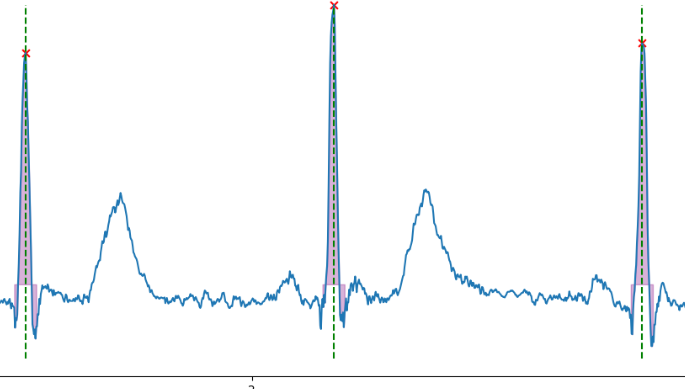

Window (distance) = 300

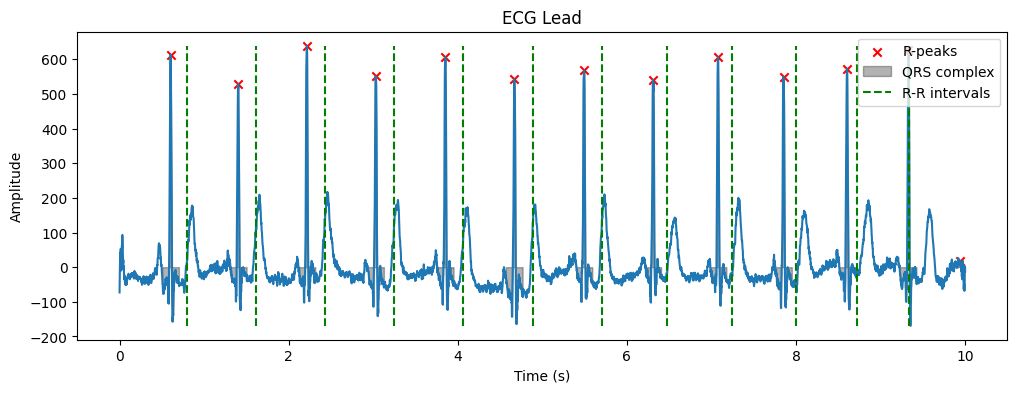
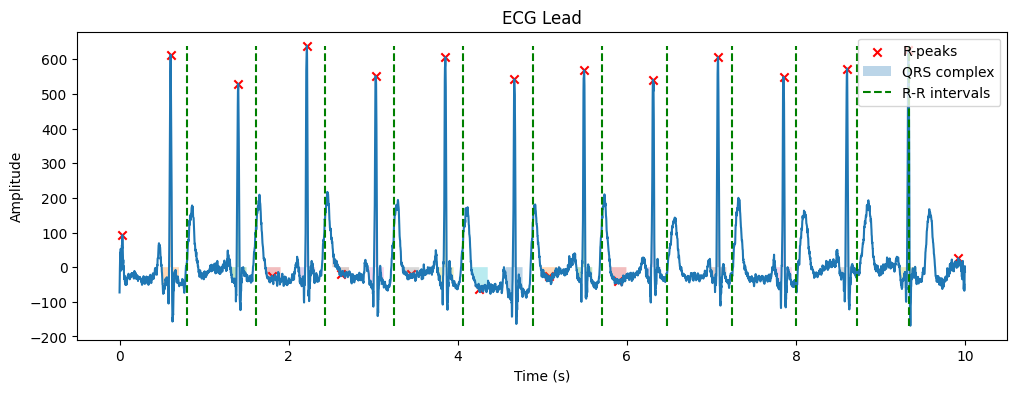

Window (distance)= 200

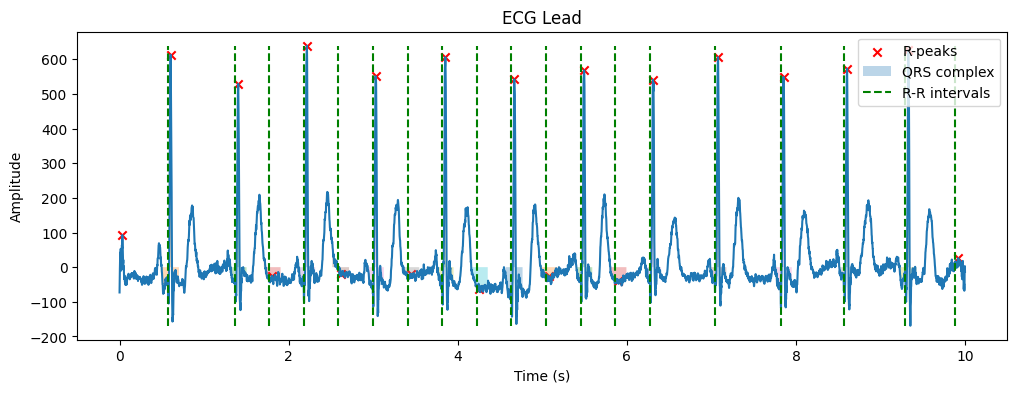

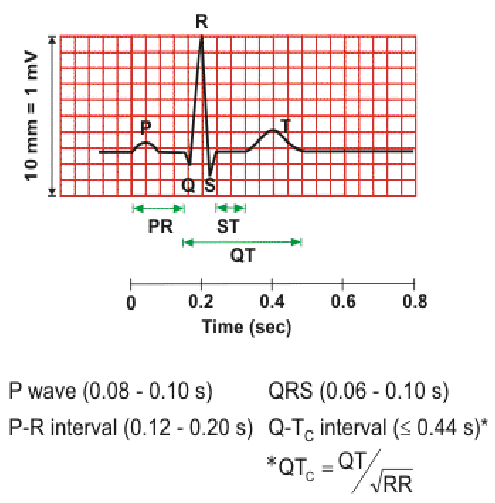

### P and T

In [96]:
import numpy as np
from scipy.signal import find_peaks

def extract_p_peaks(ecg_lead, rr_intervals):
    """
    Extract P-peak locations from the ECG lead using R-R intervals as a reference.
    """
    p_peaks = []
    for i in range(len(rr_intervals)):
        r_peak = peaks[i]
        r_next_peak = peaks[i+1]
        
        # Define a search window for the P-peak
        window_start = r_peak - int(0.4 * rr_intervals[i])  # Adjust this value as needed
        window_end = r_peak - int(0.1 * rr_intervals[i])  # Adjust this value as needed
        
        # Find the maximum value within the search window
        p_peak_idx = window_start + np.argmax(ecg_lead[window_start:window_end])
        p_peaks.append(p_peak_idx)
    
    return p_peaks

def extract_t_peaks(ecg_lead, rr_intervals):
    """
    Extract T-peak locations from the ECG lead using R-R intervals as a reference.
    """
    t_peaks = []
    for i in range(len(rr_intervals)):
        r_peak = peaks[i]
        r_next_peak = peaks[i+1]
        
        # Define a search window for the T-peak
        window_start = r_peak + int(10 * rr_intervals[i] + 150)  # Adjust this value as needed
        window_end = r_next_peak - int(10* rr_intervals[i])  # Adjust this value as needed
        
        # Find the maximum value within the search window
        t_peak_idx = window_start + np.argmax(ecg_lead[window_start:window_end])
        t_peaks.append(t_peak_idx)
    
    return t_peaks

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract R-peak locations and R-R intervals
peaks, _ = find_peaks(ecg_lead, distance=350)
rr_intervals = np.diff(peaks) / sampling_rate

# Extract P-peaks and T-peaks
p_peaks = extract_p_peaks(ecg_lead, rr_intervals)
t_peaks = extract_t_peaks(ecg_lead, rr_intervals)

ValueError: attempt to get argmax of an empty sequence

In [112]:
import numpy as np
from scipy.signal import find_peaks

def extract_p_peaks(ecg_lead, amplitude_threshold=100):
    """
    Extract P-peak locations from the ECG lead based on an amplitude threshold.
    """
    p_peaks, _ = find_peaks(ecg_lead, height=amplitude_threshold, distance=150)
    return p_peaks

def extract_t_peaks(ecg_lead, amplitude_threshold=200):
    """
    Extract T-peak locations from the ECG lead based on an amplitude threshold.
    """
    t_peaks, _ = find_peaks(ecg_lead, height=amplitude_threshold, distance=350)
    return t_peaks

# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract P-peaks and T-peaks
p_peaks = extract_p_peaks(ecg_lead, amplitude_threshold=100)
t_peaks = extract_t_peaks(ecg_lead, amplitude_threshold=200)

In [151]:
import numpy as np
from scipy.signal import find_peaks

def extract_p_peaks(ecg_lead):
    """
    Extract P-peak locations from the ECG lead using a specified height range.
    """
    p_peaks, _ = find_peaks(ecg_lead, height=(15, 60), distance=150)
    return p_peaks

def extract_t_peaks(ecg_lead):
    """
    Extract T-peak locations from the ECG lead using a specified height range.
    """
    t_peaks, _ = find_peaks(ecg_lead, height=( 100, 300), distance=350)
    return t_peaks

# Assuming ecg_data is already loaded and is a numpy array
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract P-peaks and T-peaks
# p_peaks = extract_p_peaks(ecg_lead)
t_peaks = extract_t_peaks(ecg_lead)

# Optionally, print or process the extracted peaks
# print("P-peaks indices:", p_peaks)
print("T-peaks indices:", t_peaks)


T-peaks indices: [ 429  827 1229 1646 2058 2457 2867 3283 3659 4047 4428 4787]


In [148]:
import numpy as np
from scipy.signal import find_peaks

def extract_r_peaks(ecg_lead, distance=350):
    """
    Extract R-peak locations from the ECG lead.
    """
    r_peaks, _ = find_peaks(ecg_lead, distance=distance)
    return r_peaks

def extract_p_peaks_before_r(ecg_lead, r_peaks, window_size=200):
    """
    Extract P-peak locations from the ECG lead, constrained to be just before R-peaks.
    """
    p_peaks = []
    for r_peak in r_peaks:
        start_index = max(0, r_peak - window_size)
        if start_index < r_peak:  # Ensure there is a range to check
            p_peak_region = ecg_lead[start_index:r_peak]
            p_peak_relative, _ = find_peaks(p_peak_region, height=(15, 75))
            if p_peak_relative.size > 0:
                # Find peak closest to R-peak
                p_peak = p_peak_relative[np.argmax(p_peak_region[p_peak_relative])] + start_index
                p_peaks.append(p_peak)
    return np.array(p_peaks)

# Assuming ecg_data is already loaded and is a numpy array
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# First extract R-peaks
r_peaks = extract_r_peaks(ecg_lead, distance=350)

# Then extract P-peaks that occur just before R-peaks
p_peaks = extract_p_peaks_before_r(ecg_lead, r_peaks, window_size=200)  # window size can be adjusted based on ECG characteristics

# Optionally, print or process the extracted peaks
print("R-peaks indices:", r_peaks)
print("P-peaks indices:", p_peaks)


R-peaks indices: [ 302  702 1108 1514 1926 2334 2747 3154 3539 3926 4302 4663]
P-peaks indices: [ 233  640 1050 1453 1870 2691 3095 3490 3870 4244 4596]


In [149]:
p_peaks

array([ 233,  640, 1050, 1453, 1870, 2691, 3095, 3490, 3870, 4244, 4596],
      dtype=int64)

# Plot

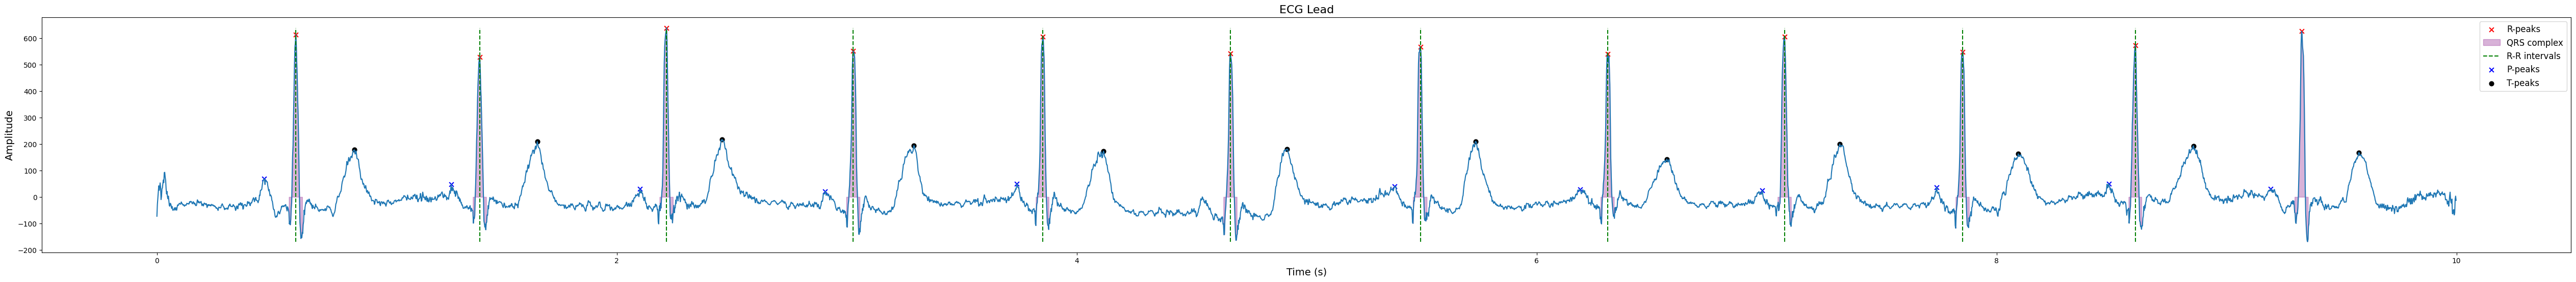

In [152]:
def plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals=None, qrs_durations=None, qrs_amplitudes=None):
    # Calculate time axis
    time = np.arange(len(ecg_lead)) / sampling_rate
    
    # Plot ECG lead
    fig, ax = plt.subplots(figsize=(64, 6))  # Increased plot size
    ax.plot(time, ecg_lead)
    ax.set_xlabel('Time (s)', fontsize=14)  # Increased font size for x-axis label
    ax.set_ylabel('Amplitude', fontsize=14)  # Increased font size for y-axis label
    ax.set_title('ECG Lead', fontsize=16)  # Increased font size for title
    
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)
    
    # Plot R-peaks
    peak_times = peaks / sampling_rate
    ax.scatter(peak_times, ecg_lead[peaks], color='r', marker='x', label='R-peaks', s=40)  # Increased marker size
    
    # Plot QRS complexes
    if qrs_durations and qrs_amplitudes:
        qrs_durations = qrs_durations[:len(peak_times)]
        qrs_amplitudes = qrs_amplitudes[:len(peak_times)]
        for peak_idx, (duration, amplitude) in enumerate(zip(qrs_durations, qrs_amplitudes)):
            peak_time = peak_times[peak_idx]
            qrs_start = peak_time - duration / 2
            qrs_end = peak_time + duration / 2
            qrs_segment = ecg_lead[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)]
            ax.fill_between(time[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)], qrs_segment, alpha=0.3, color='purple', label='QRS complex' if peak_idx == 0 else None)
    
    # Plot R-R intervals
    # if rr_intervals is not None:
    #     rr_times = np.cumsum(rr_intervals)
    #     ax.vlines(rr_times, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals')

    # Plot R-R intervals
    if rr_intervals is not None:
        for i, peak_time in enumerate(peak_times[:-1]):
            rr_interval = rr_intervals[i]
            ax.vlines(peak_time, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals' if i == 0 else None)

    # Plot P-peaks
    if p_peaks is not None:
        p_peak_times = p_peaks / sampling_rate
        ax.scatter(p_peak_times, ecg_lead[p_peaks], color='b', marker='x', label='P-peaks', s=40)

    # Plot T-peaks
    if t_peaks is not None:
        t_peak_times = t_peaks / sampling_rate
        ax.scatter(t_peak_times, ecg_lead[t_peaks], color='black', marker='o', label='T-peaks', s=40)
    
    ax.legend(fontsize=12)  # Increased font size for legend
    plt.show()


# Example usage
lead_index = 0  # Choose the lead index (0-7)
ecg_lead = ecg_data[:, lead_index]
sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract features
rr_intervals = extract_rr_intervals(ecg_lead)
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

# Plot the ECG lead with R-peaks, QRS complexes, and R-R intervals
plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals, qrs_durations, qrs_amplitudes)

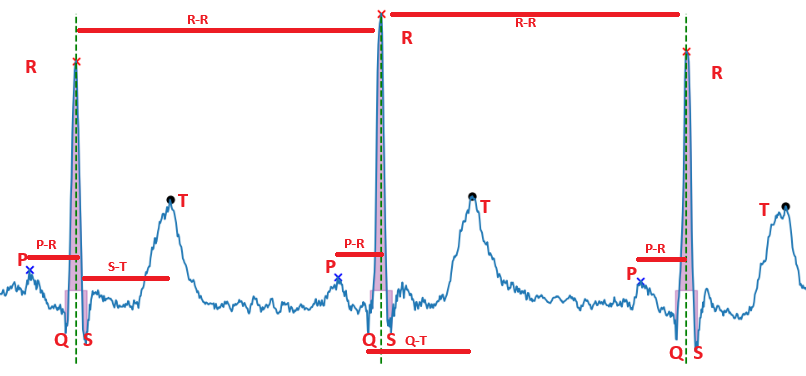

In [107]:
np.max(ecg_lead)

639.0

## Final Feature Extraction

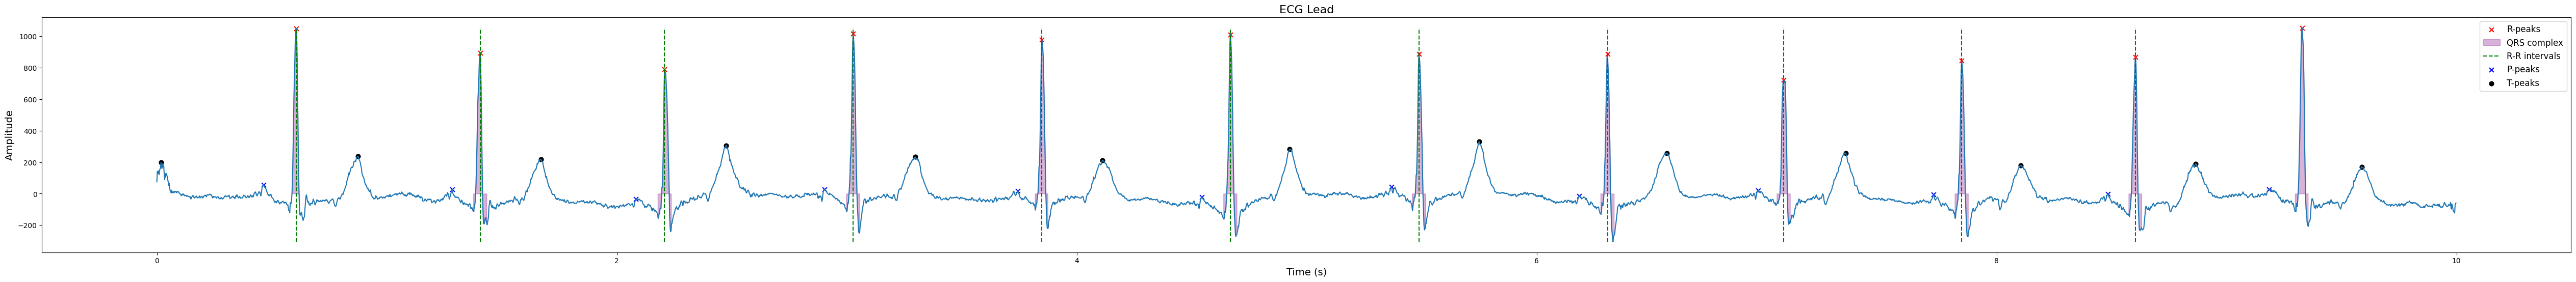

In [183]:
import numpy as np
from scipy.signal import find_peaks

def extract_rr_intervals(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)  # Adjust the distance parameter as needed
    
    # Calculate R-R intervals
    rr_intervals = np.diff(peaks) / sampling_rate  # Assuming sampling_rate is known
    
    return rr_intervals

# # Example usage
# lead_index = 0  # Choose the lead index (0-7)
# ecg_lead = ecg_data[:, lead_index]
# rr_intervals = extract_rr_intervals(ecg_lead)

import numpy as np
from scipy.signal import find_peaks

def extract_qrs_features(ecg_lead):
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=300)  # Adjust the distance parameter as needed
    
    # Extract QRS complex features
    qrs_durations = []
    qrs_amplitudes = []
    for peak_idx in peaks:
        # Define a window around the R-peak
        window_start = max(0, peak_idx - 15)  # Adjust window size as needed
        window_end = min(len(ecg_lead), peak_idx + 15)
        qrs_segment = ecg_lead[window_start:window_end]
        
        # Calculate QRS duration
        qrs_duration = len(qrs_segment) / sampling_rate
        qrs_durations.append(qrs_duration)
        
        # Calculate QRS amplitude
        qrs_amplitude = np.max(qrs_segment) - np.min(qrs_segment)
        qrs_amplitudes.append(qrs_amplitude)
    
    return qrs_durations, qrs_amplitudes

# # Example usage
# lead_index = 0  # Choose the lead index (0-7)
# ecg_lead = ecg_data[:, lead_index]
# qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)

def extract_p_peaks(ecg_lead):
    """
    Extract P-peak locations from the ECG lead using a specified height range.
    """
    p_peaks, _ = find_peaks(ecg_lead, height=(-150, 100), distance=150)
    return p_peaks

def extract_t_peaks(ecg_lead):
    """
    Extract T-peak locations from the ECG lead using a specified height range.
    """
    t_peaks, _ = find_peaks(ecg_lead, height=( 100, 350), distance=350)
    return t_peaks


def extract_r_peaks(ecg_lead, distance=350):
    """
    Extract R-peak locations from the ECG lead.
    """
    r_peaks, _ = find_peaks(ecg_lead, distance=distance)
    return r_peaks

def extract_p_peaks_before_r(ecg_lead, r_peaks, window_size=150):
    """
    Extract P-peak locations from the ECG lead, constrained to be just before R-peaks.
    """
    p_peaks = []
    for r_peak in r_peaks:
        start_index = max(0, r_peak - window_size)
        if start_index < r_peak:  # Ensure there is a range to check
            p_peak_region = ecg_lead[start_index:r_peak]
            p_peak_relative, _ = find_peaks(p_peak_region, height=(-50, 75))
            if p_peak_relative.size > 0:
                # Find peak closest to R-peak
                p_peak = p_peak_relative[np.argmax(p_peak_region[p_peak_relative])] + start_index
                p_peaks.append(p_peak)
    return np.array(p_peaks)

# # Assuming ecg_data is already loaded and is a numpy array
# lead_index = 0  # Choose the lead index (0-7)
# ecg_lead = ecg_data[:, lead_index]
# sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# # First extract R-peaks
# r_peaks = extract_r_peaks(ecg_lead, distance=350)

# # Then extract P-peaks that occur just before R-peaks
# p_peaks = extract_p_peaks_before_r(ecg_lead, r_peaks, window_size=200)  # window size can be adjusted based on ECG characteristics

# # Optionally, print or process the extracted peaks
# print("R-peaks indices:", r_peaks)
# print("P-peaks indices:", p_peaks)



def plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals=None, qrs_durations=None, qrs_amplitudes=None):
    # Calculate time axis
    time = np.arange(len(ecg_lead)) / sampling_rate
    
    # Plot ECG lead
    fig, ax = plt.subplots(figsize=(64, 6))  # Increased plot size
    ax.plot(time, ecg_lead)
    ax.set_xlabel('Time (s)', fontsize=14)  # Increased font size for x-axis label
    ax.set_ylabel('Amplitude', fontsize=14)  # Increased font size for y-axis label
    ax.set_title('ECG Lead', fontsize=16)  # Increased font size for title
    
    # Find R-peak locations
    peaks, _ = find_peaks(ecg_lead, distance=350)
    
    # Plot R-peaks
    peak_times = peaks / sampling_rate
    ax.scatter(peak_times, ecg_lead[peaks], color='r', marker='x', label='R-peaks', s=40)  # Increased marker size
    
    # Plot QRS complexes
    if qrs_durations and qrs_amplitudes:
        qrs_durations = qrs_durations[:len(peak_times)]
        qrs_amplitudes = qrs_amplitudes[:len(peak_times)]
        for peak_idx, (duration, amplitude) in enumerate(zip(qrs_durations, qrs_amplitudes)):
            peak_time = peak_times[peak_idx]
            qrs_start = peak_time - duration / 2
            qrs_end = peak_time + duration / 2
            qrs_segment = ecg_lead[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)]
            ax.fill_between(time[int(qrs_start * sampling_rate):int(qrs_end * sampling_rate)], qrs_segment, alpha=0.3, color='purple', label='QRS complex' if peak_idx == 0 else None)
    
    # Plot R-R intervals
    # if rr_intervals is not None:
    #     rr_times = np.cumsum(rr_intervals)
    #     ax.vlines(rr_times, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals')

    # Plot R-R intervals
    if rr_intervals is not None:
        for i, peak_time in enumerate(peak_times[:-1]):
            rr_interval = rr_intervals[i]
            ax.vlines(peak_time, ymin=np.min(ecg_lead), ymax=np.max(ecg_lead), colors='g', linestyles='--', label='R-R intervals' if i == 0 else None)

    # Plot P-peaks
    if p_peaks is not None:
        p_peak_times = p_peaks / sampling_rate
        ax.scatter(p_peak_times, ecg_lead[p_peaks], color='b', marker='x', label='P-peaks', s=40)

    # Plot T-peaks
    if t_peaks is not None:
        t_peak_times = t_peaks / sampling_rate
        ax.scatter(t_peak_times, ecg_lead[t_peaks], color='black', marker='o', label='T-peaks', s=40)
    
    ax.legend(fontsize=12)  # Increased font size for legend
    plt.show()


# Example usage
lead_index = 5  # Choose the lead index (0,1,4,5,6,7 only) No 2,3

ecg_lead = ecg_data[:, lead_index]



sampling_rate = 500  # Assuming a sampling rate of 500 Hz

# Extract features
rr_intervals = extract_rr_intervals(ecg_lead)
qrs_durations, qrs_amplitudes = extract_qrs_features(ecg_lead)
# First extract R-peaks
r_peaks = extract_r_peaks(ecg_lead, distance=350)
# Then extract P-peaks that occur just before R-peaks
p_peaks = extract_p_peaks_before_r(ecg_lead, r_peaks, window_size=100)  # window size can be adjusted based on ECG characteristics
t_peaks = extract_t_peaks(ecg_lead)

# Plot the ECG lead with R-peaks, QRS complexes, and R-R intervals
plot_ecg_lead(ecg_lead, sampling_rate, rr_intervals, qrs_durations, qrs_amplitudes)


In [162]:
ecg_lead

array([-73., -29.,  -5., ...,  -8.,   3., -13.])

### Principal Component Analysis (PCA):

In [37]:
import numpy as np
from sklearn.decomposition import PCA

# Reshape ECG data to 2D (samples x features)
ecg_data_2d = ecg_data.reshape(-1, ecg_data.shape[-1])

# Standardize the data
ecg_data_std = (ecg_data_2d - np.mean(ecg_data_2d, axis=0)) / np.std(ecg_data_2d, axis=0)

# Perform PCA
pca = PCA(n_components=0.95)  # Explain 95% of the variance
ecg_data_pca = pca.fit_transform(ecg_data_std)

# Get the number of principal components
n_components = ecg_data_pca.shape[1]
print(f"Number of principal components: {n_components}")

Number of principal components: 3


In [155]:
ecg_data_pca

array([[ 0.58855328, -1.0984685 , -0.59952092],
       [ 1.40272458, -1.55906833, -0.04629492],
       [ 2.09532412, -1.15459822, -0.3184977 ],
       ...,
       [-1.34712008,  0.40590775, -0.27529166],
       [-1.32552209,  0.15328683, -0.05228288],
       [-1.78832571, -0.09063185, -0.5481576 ]])

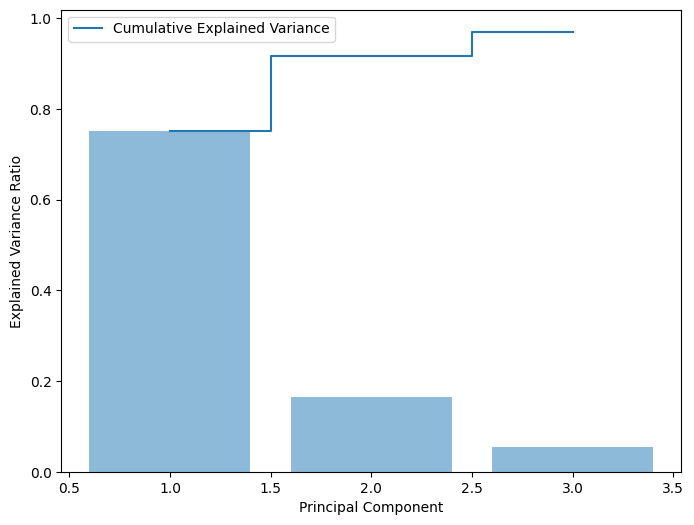

In [156]:
import matplotlib.pyplot as plt

# Compute the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.show()

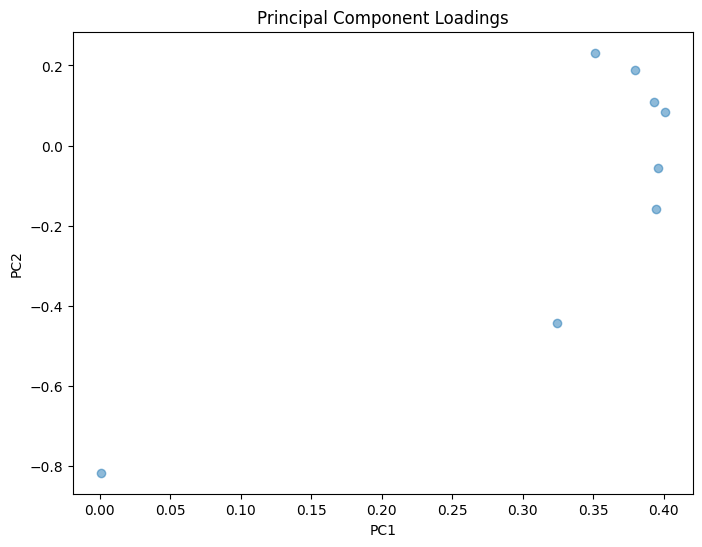

In [157]:
# Get the loadings (coefficients) for the first two principal components
loadings = pca.components_[:2]

# Plot the loadings as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(loadings[0], loadings[1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Loadings')
plt.show()

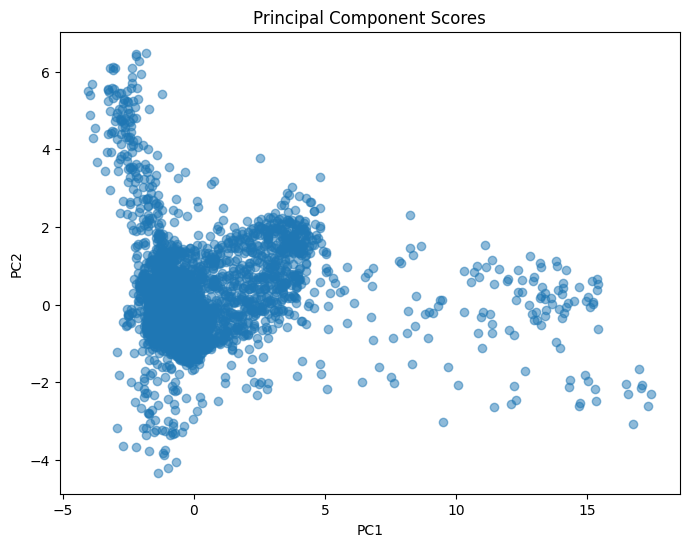

In [158]:
# Get the scores (projections) for the first two principal components
scores = pca.transform(ecg_data_std)[:, :2]

# Plot the scores as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Scores')
plt.show()